In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
width, height= 224, 224
img = cv2.imread('/content/drive/MyDrive/dataset/train/Aamir_Khan/9.jpg')
img_resized = cv2.resize(img,(width, height))

In [9]:
img_resized.shape

(224, 224, 3)

(583, 875, 3)


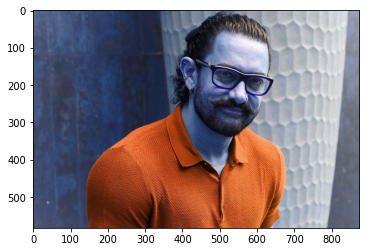

In [5]:
plt.imshow(img)
print(img.shape)

(224, 224, 3)


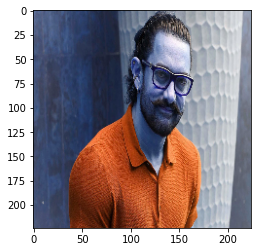

In [6]:
plt.imshow(img_resized)
print(img_resized.shape)

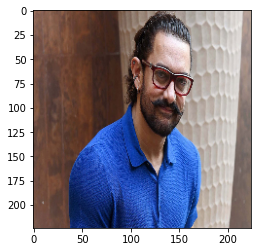

In [7]:
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

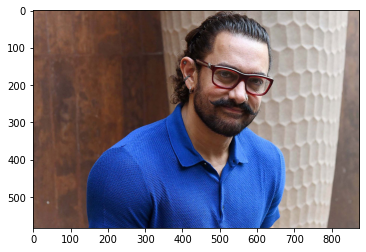

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (width, height),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 567 images belonging to 5 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                            target_size = (width, height),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 25 images belonging to 5 classes.


In [22]:
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/dataset/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [23]:
folders

['/content/drive/MyDrive/dataset/train/Aamir_Khan',
 '/content/drive/MyDrive/dataset/train/Amrita_Rao',
 '/content/drive/MyDrive/dataset/train/Abhishek_Bachchan',
 '/content/drive/MyDrive/dataset/train/Anil_Kapoor',
 '/content/drive/MyDrive/dataset/train/Ayushmann_Khurrana']

In [24]:
# fit the model
r = model.fit_generator( training_set,validation_data=test_set,epochs=15)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 206 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 724 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 170 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 178 bytes but o

18/18 [==============================] - 13s 671ms/step - loss: 1.8470 - accuracy: 0.3739 - val_loss: 0.8798 - val_accuracy: 0.6400
Epoch 2/15
18/18 [==============================] - 12s 632ms/step - loss: 0.5234 - accuracy: 0.8430 - val_loss: 0.7829 - val_accuracy: 0.6000
Epoch 3/15
18/18 [==============================] - 12s 651ms/step - loss: 0.2324 - accuracy: 0.9683 - val_loss: 0.8209 - val_accuracy: 0.7200
Epoch 4/15
18/18 [==============================] - 12s 631ms/step - loss: 0.1290 - accuracy: 0.9929 - val_loss: 0.7212 - val_accuracy: 0.7200
Epoch 5/15
18/18 [==============================] - 12s 629ms/step - loss: 0.0796 - accuracy: 1.0000 - val_loss: 0.6303 - val_accuracy: 0.8000
Epoch 6/15
18/18 [==============================] - 12s 646ms/step - loss: 0.0572 - accuracy: 1.0000 - val_loss: 0.6173 - val_accuracy: 0.8800
Epoch 7/15
18/18 [==============================] - 12s 641ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 0.5837 - val_accuracy: 0.8400
Epoch 8/15

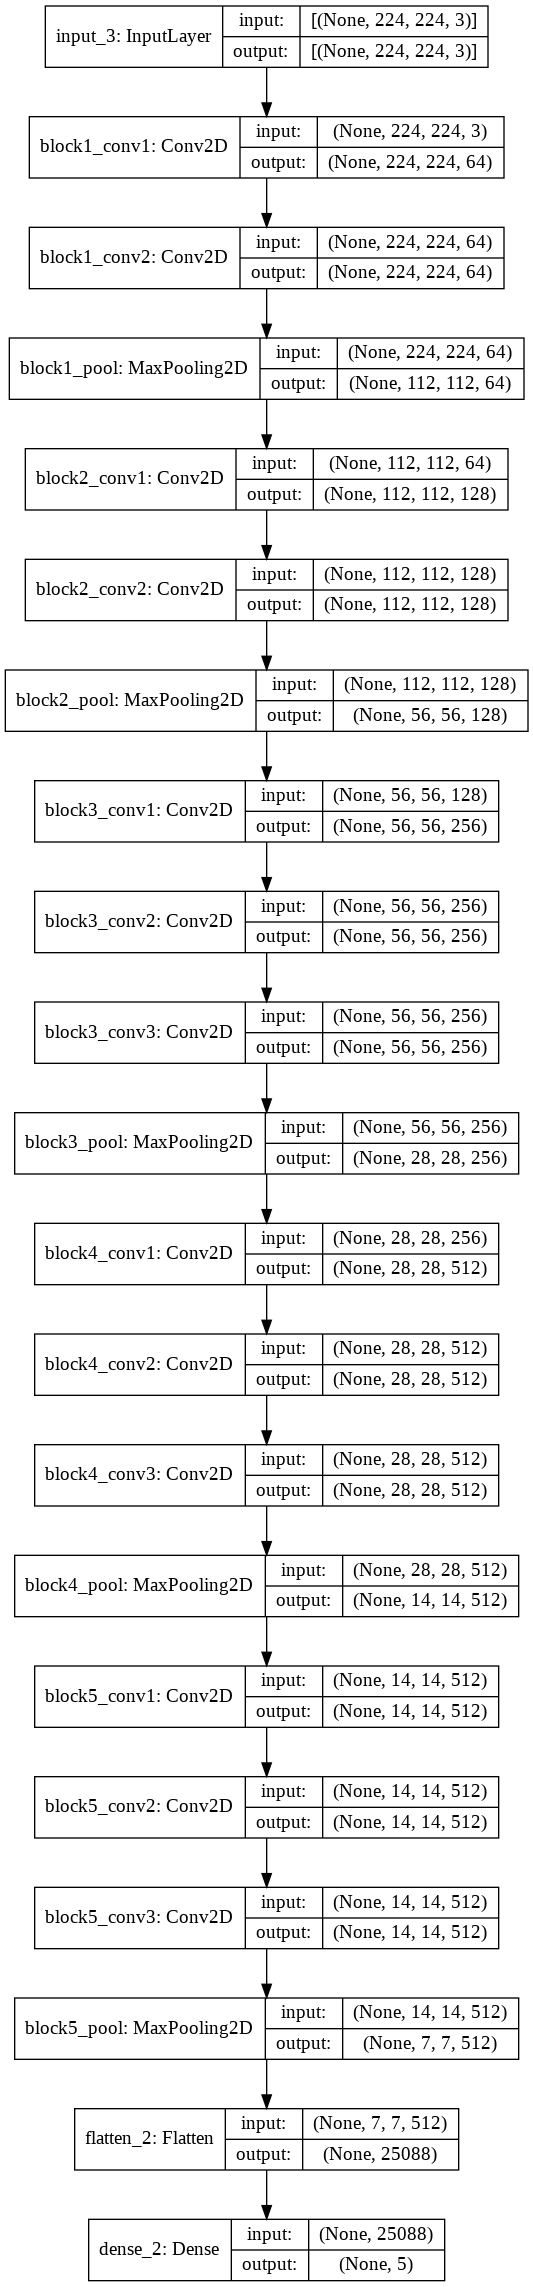

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True, show_layer_names=True)